In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import os,itertools
from scipy.interpolate import griddata
import os,glob,imp,copy
import numpy as np
import seaborn as sns
import pyslha, copy, pickle
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

/var/folders/vm/rx9z7kn56yv6hvpfb9yts7vh0000gn/T/ipykernel_2028/3197712742.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import os,glob,imp,copy


In [2]:
def interpolateData(x,y,z,nx=200,ny=200,method='linear',fill_value=np.nan,xnew=None,ynew=None):

    if x.min() == x.max() or y.min() == y.max(): # Can not interpolate
        return None,None,None
    elif xnew is None or ynew is None:
        xnew = np.linspace(x.min(),x.max(),nx)
        ynew = np.linspace(y.min(),y.max(),ny)

    xi = np.array([list(v) for v in itertools.product(xnew,ynew)])
    znew = griddata(list(zip(x,y)),z,xi=xi, 
                    method=method,fill_value=fill_value)
    znew = np.reshape(znew,(len(xnew),len(ynew)))
    xnew,ynew  = np.meshgrid(xnew,ynew,indexing='ij')

    return xnew,ynew,znew

# Function to replace 'e-18' with 'e-20' in floats
def replace_exponent(val, old_exponent, new_exponent):
    return float(str(val).replace(old_exponent, new_exponent))

In [3]:
# THSCPM1

readSummary = True # whether to read SModelS results or load stored data

# Read SModelS summary
if readSummary:
    df_C1C1 = pd.read_csv('THSCPM1_summary.txt'
                     ,skiprows=3,sep='\\s+')
    condition = df_C1C1['r_max'].notna()
    df_C1C1 = df_C1C1[condition]
    
    # Add model data
    slha_dir_C1C1 = '/Users/altakach/SModelS3/smodels/run-dir-validation-ATLAS-SUSY-18-42-THSCPM1/slha/'
    modelData_C1C1 = []
    for f in df_C1C1['#filename']:
        data_C1C1 = pyslha.readSLHAFile(os.path.join(slha_dir_C1C1,f))
        mC1 = abs(data_C1C1.blocks['MASS'][1000024])
        mN1 = abs(data_C1C1.blocks['MASS'][1000022])
        width_C1 = data_C1C1.decays[1000024].totalwidth
        modelData_C1C1.append([mC1,mN1,width_C1])
    modelData_C1C1 = np.array(modelData_C1C1)
    df_C1C1[['mC1','mN1','wC1']] = modelData_C1C1
    
    df_copy = df_C1C1.copy()
    df_copy['#filename'] = df_copy['#filename'].astype(str).str.replace('e-18', 'e-20')
    df_copy['wC1'] = df_copy['wC1'].apply(replace_exponent, old_exponent='e-18', new_exponent='e-20')
    df_C1C1 = pd.concat([df_C1C1, df_copy], ignore_index=True)
        
    # Save to CSV
    df_C1C1.to_csv('validation_data_THSCPM1.csv')
else:
    # Read stored results
    df_C1C1 = pd.read_csv('validation_data_THSCPM1.csv')

In [4]:
# THSCPM2

readSummary = True # whether to read SModelS results or load stored data

# Read SModelS summary
if readSummary:
    df_C1N1 = pd.read_csv('THSCPM2_summary.txt'''
                     ,skiprows=3,sep='\\s+')
    condition = df_C1N1['r_max'].notna()
    df_C1N1 = df_C1N1[condition]
    
    # Add model data
    slha_dir_C1N1 = '/Users/altakach/SModelS3/smodels/run-dir-validation-ATLAS-SUSY-18-42-THSCPM2/slha/'
    modelData_C1N1 = []
    for f in df_C1N1['#filename']:
        data_C1N1 = pyslha.readSLHAFile(os.path.join(slha_dir_C1N1,f))
        mC1 = abs(data_C1N1.blocks['MASS'][1000024])
        mN1 = abs(data_C1N1.blocks['MASS'][1000022])
        width_C1 = data_C1N1.decays[1000024].totalwidth
        modelData_C1N1.append([mC1,mN1,width_C1])
    modelData_C1N1 = np.array(modelData_C1N1)
    df_C1N1[['mC1','mN1','wC1']] = modelData_C1N1
    
    df_copy = df_C1N1.copy()
    df_copy['#filename'] = df_copy['#filename'].astype(str).str.replace('e-18', 'e-20')
    df_copy['wC1'] = df_copy['wC1'].apply(replace_exponent, old_exponent='e-18', new_exponent='e-20')
    df_C1N1 = pd.concat([df_C1N1, df_copy], ignore_index=True)
    
    # Save to CSV
    df_C1N1.to_csv('validation_data_THSCPM2.csv')
else:
    # Read stored results
    df_C1N1 = pd.read_csv('validation_data_THSCPM2.csv')

In [5]:
x_C1C1,y_C1C1 = df_C1C1['mC1'], 6.582e-25 / (df_C1C1['wC1']*10**-9)
rValues_C1C1 = df_C1C1['r_max']
nx_C1C1 = len(x_C1C1)
ny_C1C1 = len(y_C1C1)

print(nx_C1C1)
print(ny_C1C1)

xnew_C1C1,ynew_C1C1,znew_C1C1 = interpolateData(x_C1C1,y_C1C1,rValues_C1C1,nx=nx_C1C1,ny=ny_C1C1,fill_value=0.0)

x_C1N1,y_C1N1 = df_C1N1['mC1'], 6.582e-25 / (df_C1N1['wC1']*10**-9)
rValues_C1N1 = df_C1N1['r_max']
nx_C1N1 = len(x_C1N1)
ny_C1N1 = len(y_C1N1)

print(nx_C1N1)
print(ny_C1N1)

xnew_C1N1,ynew_C1N1,znew_C1N1 = interpolateData(x_C1N1,y_C1N1,rValues_C1N1,nx=nx_C1N1,ny=ny_C1N1,fill_value=0.0)


98
98
96
96


In [6]:
sorted_df_C1C1 = df_C1C1.sort_values(by='#filename')
sorted_df_C1N1 = df_C1N1.sort_values(by='#filename')

# Remove '-Original' from the '#filename' column
sorted_df_C1C1['#filename'] = sorted_df_C1C1['#filename'].str.replace('-Original', '')


# Find common values in the specified column
common_values = set(sorted_df_C1C1['#filename']).intersection(set(sorted_df_C1N1['#filename']))

# Filter both DataFrames to keep only the rows with common values
df_C1C1_filtered = sorted_df_C1C1[sorted_df_C1C1['#filename'].isin(common_values)]
df_C1N1_filtered = sorted_df_C1N1[sorted_df_C1N1['#filename'].isin(common_values)]

df_C1C1_filtered = df_C1C1_filtered.reset_index(drop=True)
df_C1N1_filtered = df_C1N1_filtered.reset_index(drop=True)

# save the data frames inro csv files
df_C1C1_filtered.to_csv('filtered_validation_data_THSCPM1.csv')
df_C1N1_filtered.to_csv('filtered_validation_data_THSCPM2.csv')

# combine C1N1 and C1C1 results
df_Comb = df_C1C1_filtered.copy()
df_Comb['r_max'] = df_C1C1_filtered['r_max'] + df_C1N1_filtered['r_max']
df_Comb['r_exp'] = df_C1C1_filtered['r_exp'] + df_C1N1_filtered['r_exp']
df_Comb['r(ATLAS)'] = df_C1C1_filtered['r(ATLAS)'] + df_C1N1_filtered['r(ATLAS)']
df_Comb['r_exp(ATLAS)'] = df_C1C1_filtered['r_exp(ATLAS)'] + df_C1N1_filtered['r_exp(ATLAS)']

# save the data frames inro csv files
df_Comb.to_csv('Comb_validation_data_THSCPM1-THSCPM2.csv')

x_Comb,y_Comb = df_Comb['mC1'], 6.582e-25 / (df_Comb['wC1']*10**-9)
rValues_Comb = df_Comb['r_max']
nx_Comb = len(x_Comb)
ny_Comb = len(y_Comb)

print(nx_Comb)
print(ny_Comb)

xnew_Comb,ynew_Comb,znew_Comb = interpolateData(x_Comb,y_Comb,rValues_Comb,nx=nx_Comb,ny=ny_Comb,fill_value=0.0)

96
96


In [7]:
# Official curve
excATLAS = np.genfromtxt('../orig/Chargino_Obs_massLim_Stable.csv',skip_header=1,delimiter=',')

print(excATLAS)

excATLAS[0,1] = 5.900000e-18
excATLAS[1,1] = 5.900000e-20
# Convert the first column from GeV to nano seconds
excATLAS[:, 1] = 6.582e-25 / (excATLAS[:, 1] * 10**-9)

print(excATLAS)


[[1.069e+03 6.582e-18]
 [1.069e+03 0.000e+00]]
[[ 1069.           111.55932203]
 [ 1069.         11155.93220339]]


/var/folders/vm/rx9z7kn56yv6hvpfb9yts7vh0000gn/T/ipykernel_2028/1617894495.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_C1C1, y_C1C1, c=rValues_C1C1, s=50, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0., vmax=2.)


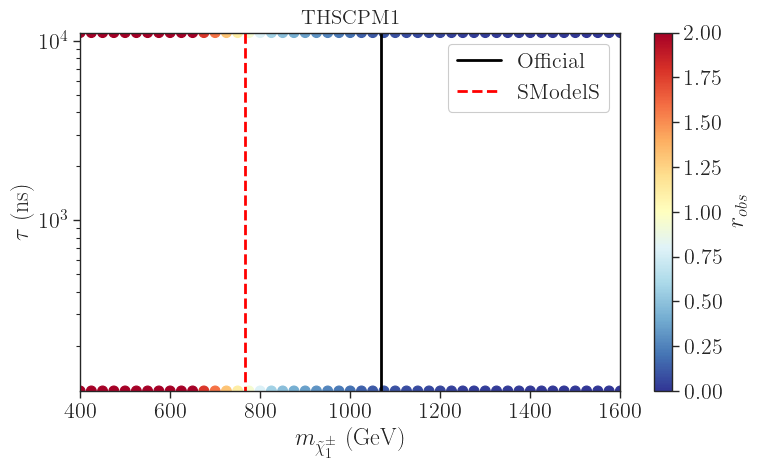

In [8]:
fig = plt.figure(figsize=(8, 5))

# Plot contour
contour = plt.contour(xnew_C1C1, ynew_C1C1, znew_C1C1, [1.0], colors='red', linestyles=['dashed'], linewidths=2.0)

# Plot scatter
plt.scatter(x_C1C1, y_C1C1, c=rValues_C1C1, s=50, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0., vmax=2.)

# Plot ATLAS curve
plt.plot(excATLAS[:,0], excATLAS[:,1], label='Official', linewidth=2, color='black')

# Add labels and title
plt.ylabel(r'$\tau$ (ns)')
plt.xlabel(r'$m_{\tilde\chi_1^\pm}$ (GeV)')
plt.yscale('log')
plt.title('THSCPM1', fontsize=15)

# Add colorbar
plt.colorbar(label=r'$r_{obs}$')

# Create a custom legend entry for the contour
contour_legend = Line2D([0], [0], color='red', linestyle='dashed', linewidth=2.0, label='SModelS')

# Append the new legend entry to the existing ones
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(contour_legend)
labels.append('SModelS')

# Update legend with all entries
plt.legend(handles=handles, labels=labels, framealpha=1.0, loc='upper right')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('THSCPM1.png')
plt.show()

/var/folders/vm/rx9z7kn56yv6hvpfb9yts7vh0000gn/T/ipykernel_2028/3188055651.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_C1N1, y_C1N1, c=rValues_C1N1, s=50, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0., vmax=2.)


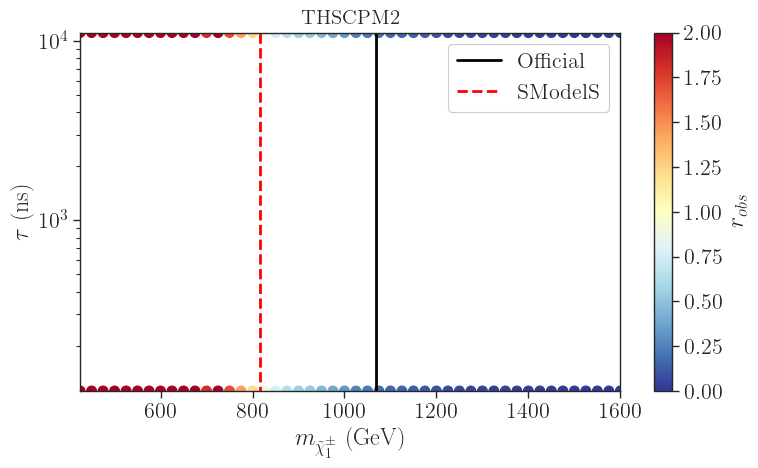

In [9]:
fig = plt.figure(figsize=(8, 5))

# Plot contour
contour = plt.contour(xnew_C1N1, ynew_C1N1, znew_C1N1, [1.0], colors='red', linestyles=['dashed'], linewidths=2.0)

# Plot scatter
plt.scatter(x_C1N1, y_C1N1, c=rValues_C1N1, s=50, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0., vmax=2.)

# Plot ATLAS curve
plt.plot(excATLAS[:,0], excATLAS[:,1], label='Official', linewidth=2, color='black')

# Add labels and title
plt.ylabel(r'$\tau$ (ns)')
plt.xlabel(r'$m_{\tilde\chi_1^\pm}$ (GeV)')
plt.yscale('log')
plt.title('THSCPM2', fontsize=15)

# Add colorbar
plt.colorbar(label=r'$r_{obs}$')

# Create a custom legend entry for the contour
contour_legend = Line2D([0], [0], color='red', linestyle='dashed', linewidth=2.0, label='SModelS')

# Append the new legend entry to the existing ones
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(contour_legend)
labels.append('SModelS')

# Update legend with all entries
plt.legend(handles=handles, labels=labels, framealpha=1.0, loc='upper right')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('THSCPM2.png')
plt.show()

/var/folders/vm/rx9z7kn56yv6hvpfb9yts7vh0000gn/T/ipykernel_2028/1935393204.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_Comb, y_Comb, c=rValues_Comb, s=50, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0., vmax=2.)


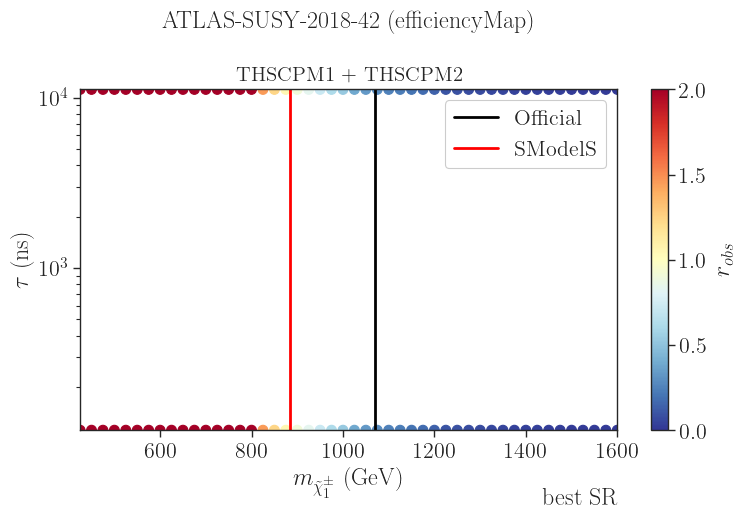

In [13]:
fig = plt.figure(figsize=(8, 6))

# Plot contour
contour = plt.contour(xnew_Comb, ynew_Comb, znew_Comb, [1.0], colors='red', linestyles='-', linewidths=2.0)

# Plot scatter
plt.scatter(x_Comb, y_Comb, c=rValues_Comb, s=50, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0., vmax=2.)

# Plot ATLAS curve
plt.plot(excATLAS[:, 0], excATLAS[:, 1], label='Official', linewidth=2, color='black')

# Add labels and title
plt.ylabel(r'$\tau$ (ns)')
plt.xlabel(r'$m_{\tilde\chi_1^\pm}$ (GeV)')
plt.yscale('log')
plt.title(r'THSCPM1 + THSCPM2', fontsize=15)

# Add colorbar
plt.colorbar(label=r'$r_{obs}$')

# Create a custom legend entry for the contour
contour_legend = Line2D([0], [0], color='red', linestyle='-', linewidth=2.0, label='SModelS')

# Append the new legend entry to the existing ones
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(contour_legend)
labels.append('SModelS')

# Update legend with all entries
plt.legend(handles=handles, labels=labels, framealpha=1.0, loc='upper right')

# Add text above the plot in the middle
plt.text(0.5, 1.2, 'ATLAS-SUSY-2018-42 (efficiencyMap)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add text at the bottom right
plt.text(1, -0.2, 'best SR', horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('THSCPM1-THSCPM2.png')
plt.show()